In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = pd.read_csv('/content/drive/MyDrive/TataSteel10years.csv')
# x = pd.read_csv('TISC Historical Data.csv')

In [ ]:
x.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/19/2024,180.00,182.26,182.48,179.35,27.46M,-0.62%
1,06/18/2024,181.12,183.80,184.60,180.60,35.03M,-1.11%
2,06/14/2024,183.15,182.95,183.50,181.40,28.51M,0.32%
3,06/13/2024,182.56,183.40,184.10,180.51,36.67M,0.18%
4,06/12/2024,182.23,182.25,183.87,181.50,33.31M,0.50%


In [ ]:
reversed_x = x.iloc[::-1]

In [ ]:
reversed_x.head()

,Date,Price,Open,High,Low,Vol.,Change %
2587,01/01/2014,38.21,38.13,38.29,38.01,12.53M,0.39%
2586,01/02/2014,37.61,38.22,39.07,37.41,41.99M,-1.57%
2585,01/03/2014,37.01,37.37,37.63,36.70,33.42M,-1.60%
2584,01/06/2014,36.63,36.87,37.30,36.30,28.39M,-1.03%
2583,01/07/2014,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [ ]:
x_sorted = reversed_x.reset_index(drop=True)

In [ ]:
x_sorted.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2014,38.21,38.13,38.29,38.01,12.53M,0.39%
1,01/02/2014,37.61,38.22,39.07,37.41,41.99M,-1.57%
2,01/03/2014,37.01,37.37,37.63,36.70,33.42M,-1.60%
3,01/06/2014,36.63,36.87,37.30,36.30,28.39M,-1.03%
4,01/07/2014,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [ ]:
x_sorted['Price_diff'] = x_sorted['Price'].diff()
x_sorted['Price_diff'][0] = 0.1
x_sorted = x_sorted.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
x_sorted.head()

<ipython-input-9-381c06160b7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_sorted['Price_diff'][0] = 0.1


,Date,Price,Price_diff
0,01/01/2014,38.21,0.10
1,01/02/2014,37.61,-0.60
2,01/03/2014,37.01,-0.60
3,01/06/2014,36.63,-0.38
4,01/07/2014,35.41,-1.22


In [ ]:
x_sorted['Date'] = pd.to_datetime(x_sorted['Date'])


split = int(len(x_sorted)*0.7)
test = x_sorted[split:]
train = x_sorted[:split]

# test = x_sorted[x_sorted['Date'].dt.strftime('%Y').str.startswith('2024')]
# train = x_sorted[x_sorted['Date'] <= '2023-12-31']
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

In [ ]:
x_sorted.head()

,Date,Price,Price_diff
0,2014-01-01,38.21,0.10
1,2014-01-02,37.61,-0.60
2,2014-01-03,37.01,-0.60
3,2014-01-06,36.63,-0.38
4,2014-01-07,35.41,-1.22


In [ ]:
train.head()

,Date,Price,Price_diff
0,2014-01-01,38.21,0.10
1,2014-01-02,37.61,-0.60
2,2014-01-03,37.01,-0.60
3,2014-01-06,36.63,-0.38
4,2014-01-07,35.41,-1.22


In [ ]:
test.head()

,Date,Price,Price_diff
0,2021-05-04,106.39,-0.08
1,2021-05-05,107.01,0.62
2,2021-05-06,110.09,3.08
3,2021-05-07,118.24,8.15
4,2021-05-10,121.64,3.40


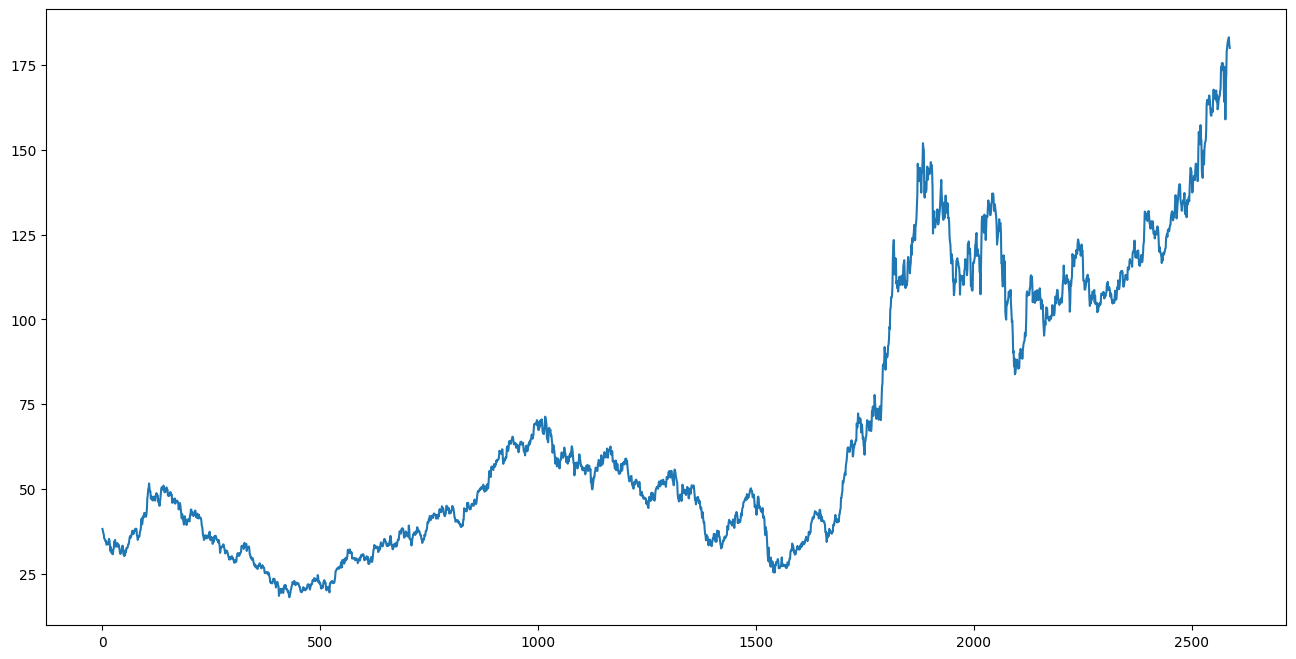

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x_sorted["Price"], label="Day-wise price")

In [ ]:
x.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
training_set = train.iloc[:,2:3].values

In [ ]:
training_set.shape

(1811, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.4537037 ],
       [0.38888889],
       [0.38888889],
       ...,
       [1.        ],
       [0.46851852],
       [0.7287037 ]])

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.7))

regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64))
regressor.add( Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                3

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=['mean_absolute_error'])
regressor.fit(X_train, y_train, epochs = 15, batch_size = 64, verbose=1)

Epoch 1/15
28/28 [==============================] - 20s 281ms/step - loss: 0.1158 - mean_absolute_error: 0.1158
Epoch 2/15
28/28 [==============================] - 7s 245ms/step - loss: 0.0816 - mean_absolute_error: 0.0816
Epoch 3/15
28/28 [==============================] - 7s 242ms/step - loss: 0.0823 - mean_absolute_error: 0.0823
Epoch 4/15
28/28 [==============================] - 7s 243ms/step - loss: 0.0797 - mean_absolute_error: 0.0797
Epoch 5/15
28/28 [==============================] - 5s 171ms/step - loss: 0.0784 - mean_absolute_error: 0.0784
Epoch 6/15
28/28 [==============================] - 6s 212ms/step - loss: 0.0773 - mean_absolute_error: 0.0773
Epoch 7/15
28/28 [==============================] - 6s 201ms/step - loss: 0.0786 - mean_absolute_error: 0.0786
Epoch 8/15
28/28 [==============================] - 5s 172ms/step - loss: 0.0772 - mean_absolute_error: 0.0772
Epoch 9/15
28/28 [==============================] - 6s 232ms/step - loss: 0.0760 - mean_absolute_error: 0.0760


In [ ]:
actual_stock_price = test.iloc[:,2:3].values

In [ ]:
dataset_total = pd.concat((train['Price_diff'], test['Price_diff']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

25/25 [==============================] - 3s 38ms/step


In [ ]:
# comparison_df = pd.DataFrame({
#     'Actual Price': actual_stock_price.flatten(),
#     'Predicted Price': predicted_price.flatten()
# })

# print(comparison_df)

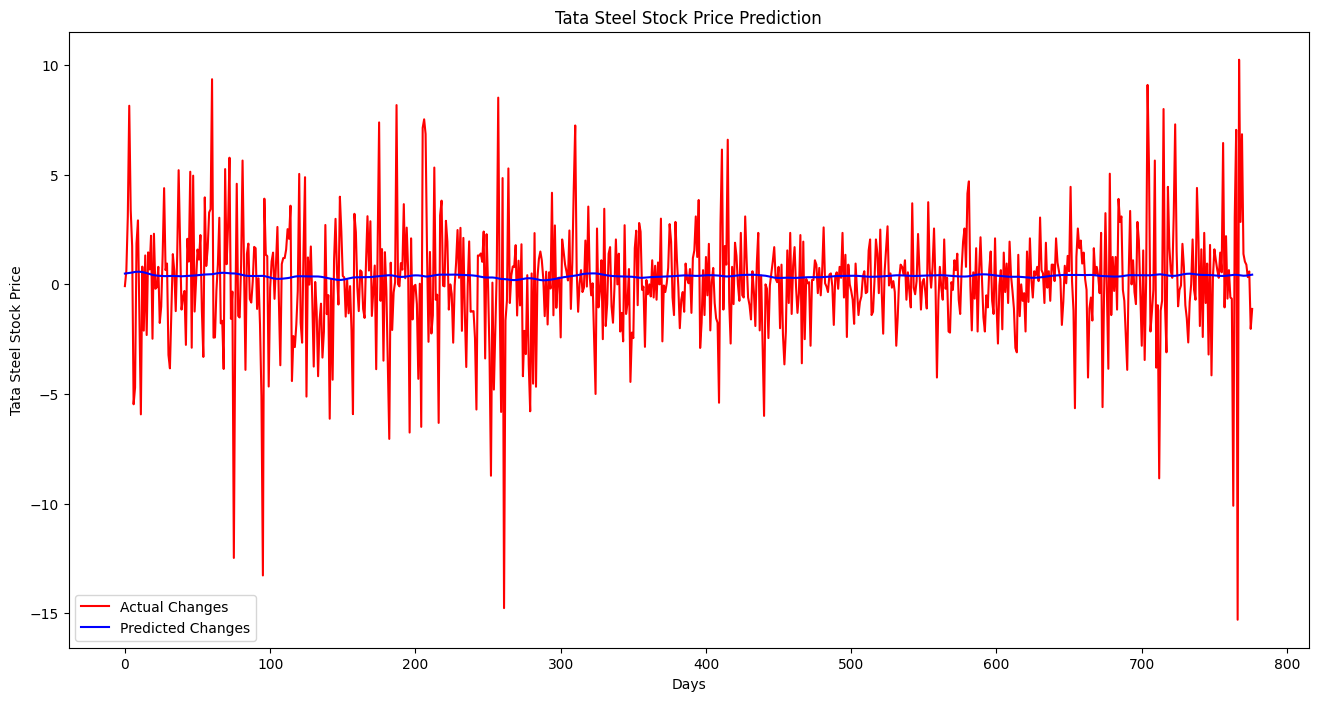

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(actual_stock_price, color = 'red', label = 'Actual Changes')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Changes')
plt.title('Tata Steel Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tata Steel Stock Price')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

mae = mean_absolute_error(actual_stock_price, predicted_price)
mse = mean_squared_error(actual_stock_price, predicted_price)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_stock_price, predicted_price)
mda = median_absolute_error(actual_stock_price, predicted_price)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("median_absolute_error:", mda)

MAE: 1.8421835331605367
MSE: 7.120228345184327
RMSE: 2.6683756004701302
MAPE: 22766629772269.64
median_absolute_error: 1.262734782695773


In [ ]:
mape = np.mean(np.abs((actual_stock_price - predicted_price) / actual_stock_price)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): inf%


<ipython-input-32-db4f2a18dc09>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_stock_price - predicted_price) / actual_stock_price)) * 100


In [ ]:
directional_accuracy = np.sign(actual_stock_price[1:] - actual_stock_price[:-1]) == np.sign(predicted_price[1:] - actual_stock_price[:-1])
print("Directional Accuracy:", np.mean(directional_accuracy)*100, "%")

Directional Accuracy: 73.06701030927834 %


1/1 [==============================] - 0s 35ms/step


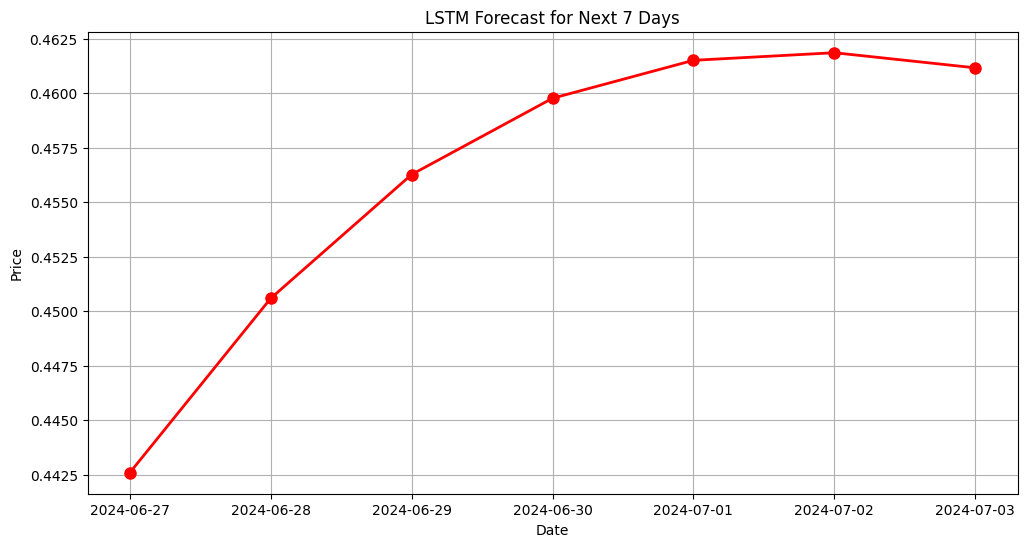

         Date  Forecasted Price
0  2024-06-27          0.442591
1  2024-06-28          0.450592
2  2024-06-29          0.456272
3  2024-06-30          0.459772
4  2024-07-01          0.461512
5  2024-07-02          0.461861
6  2024-07-03          0.461168


In [ ]:
predicted_price_next_7_days = []
current_input = X_test[-1]

for i in range(7):
    pred = regressor.predict(current_input.reshape(1, 60, 1))
    predicted_price_next_7_days.append(pred[0, 0])
    current_input = np.append(current_input[1:], pred, axis=0)

predicted_price_next_7_days = np.array(predicted_price_next_7_days).reshape(-1, 1)
predicted_price_next_7_days_scaled = sc.inverse_transform(predicted_price_next_7_days)

last_date = pd.to_datetime('2024-06-26')
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

plt.figure(figsize=(12, 6))
plt.plot(forecast_index, predicted_price_next_7_days_scaled, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('LSTM Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({'Date': forecast_index.date, 'Forecasted Price': predicted_price_next_7_days_scaled.flatten()})
print(forecast_df)